In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img src='images/porticofinal.JPG'>
<img src='images/porticofinal2.JPG' width='522px' height='348px'>

In [68]:
E = 1900000  
u = 0.2;           #Coeficiente de Poisson
G = E/(2*(1+u))
f = 6/5
numelem = 9       #Numero de elementos

#Longitudes de los elementos
Lin = np.sqrt((2*2)+(2*2))
L = [2, 2, 2, 2, 2, Lin ,Lin, 4, 5]

#Bases de los elementos
b = [0.35, 0.4, 0.35, 0.35, 0.40, 0.2, 0.2, 0.3, 0.3]

#Alturas de los elementos
h = [0.35, 0.4, 0.35, 0.35, 0.40, 0.35, 0.35 ,0.35, 0.35]

#Areas e inercias de los elementos
A = np.zeros(numelem)
I = np.zeros(numelem)

for i in range (numelem):
    A[i]=b[i]*h[i]
    I[i]=((b[i]*h[i]**3)/12)



def ke_EI_GAf_AE_extre(AE,EI,be,L,dA,dB):
    kp = 2*EI/L*(2+be)/(1+2*be)
    ap = 2*EI/L*(1-be)/(1+2*be)
    bp = 6*EI/L**2*(1)/(1+2*be)
    tp = 12*EI/L**3*(1)/(1+2*be)
    r = AE/L
    kpp = kp+2*bp*dA+tp*dA*2
    app = ap+bp*(dA+dB)+tp*(dA*dB)
    bpp = bp+tp*dA
    bppp = bp+tp*dB
    kppp = kp+2*bp*dB+tp*dB**2

    k = [[r, 0, 0, -r, 0, 0],
        [0, tp, bpp, 0, -tp, bppp],
        [0, bpp, kpp, 0, -bpp, app],
        [-r, 0, 0, r, 0, 0],
        [0, -tp, -bpp, 0, tp, -bppp],
        [0, bppp, app, 0, -bppp, kppp]]

    return k


def T_elem_MP_6x6(alfas):
#permite pasar de un sistema de coordenadas locales a globales 
#T_elem_MP_6x6(alfas)
# #alfas = angulo comprendido entre el sistema de coordenadas globales hacia el sistema de coordenadas locales 

    Ta = [[np.cosd(alfas), -np.sind(alfas), 0, 0, 0, 0],
        [np.sind(alfas), np.cosd(alfas), 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, np.cosd(alfas), -np.sind(alfas), 0],
        [0, 0, 0, np.sind(alfas), np.cosd(alfas), 0],
        [0, 0, 0, 0, 0, 1]]


def Ac(Lee,aep_L,p2):

    for i in range (1, np.len(Lee)):
        ii = Lee[i] 
        p2[ii] = p2[ii] - aep_L[i]



In [69]:
Lv = L[1]         #m

#Numero de columnas y vigas
npis = 1
ncol = 3
nvi = ncol-1
nelem = npis*(ncol+nvi)          #Numero de elementos
nelem = 9

#Grados de libertad
#Automatizar
nglt = 27          #grados de libertad incluidas restricciones
gdl = 19           #grados de libertad

#Cargas Nodales
P = ([1.5,0.5,0,0,0,0,2,0,0,0,0,0,0,0,0,-4,0,0,1.8])            #Vector de cargas nodales

#Acciones de empotramiento perfecto
w = ([0,0,0,0,0,0,0,1,2])            #t/m2


def Kelem_6GDL_MVA(E,I,G,L,A,f):

    r = A*E/L
    B = (6*E*I*f)/(G*A*(L**2))
    kp = (2*E*I/L)*((2+B)/(1+2*B))
    ap = (2*E*I/L)*((1-B)/(1-2*B))
    bp = (6*E*I/(L**2))*(1/(1+2*B))
    tp = (12*E*I/(L**3))*(1/(1+2*B))

    #Declaracion de la matriz de rigidez
    k = [[r, 0, 0, -r, 0, 0],
        [0, tp, bp, 0, -tp, bp],
        [0, bp, kp, 0, -bp, ap],
        [-r, 0, 0, r, 0, 0],
        [0, -tp, -bp, 0, tp, -bp],
        [0, bp, ap, 0, -bp, kp]]

    return k


j = 0
kelacum = np.zeros((numelem*6,6))
for i in range (numelem):
    kelacum[j:j+6,:] = Kelem_6GDL_MVA(E,I[i],G,L[i],A[i],f)
    j+=6

tbl_kelacum = pd.DataFrame(kelacum)         #Matriz acumulada de las matrices locales
display(tbl_kelacum.style.set_caption('kelacum',))

,0,1,2,3,4,5
0,116375.000000,0.000000,0.000000,-116375.000000,0.000000,0.000000
1,0.000000,3275.118889,3275.118889,0.000000,-3275.118889,3275.118889
2,0.000000,3275.118889,4463.113681,0.000000,-3275.118889,2490.906386
3,-116375.000000,0.000000,0.000000,116375.000000,0.000000,0.000000
4,0.000000,-3275.118889,-3275.118889,0.000000,3275.118889,-3275.118889
5,0.000000,3275.118889,2490.906386,0.000000,-3275.118889,4463.113681
6,152000.000000,0.000000,0.000000,-152000.000000,0.000000,0.000000
7,0.000000,5451.936872,5451.936872,0.000000,-5451.936872,5451.936872
8,0.000000,5451.936872,7478.603539,0.000000,-5451.936872,4317.203134
9,-152000.000000,0.000000,0.000000,152000.000000,0.000000,0.000000


In [70]:

j = 0
tlacum = np.zeros((numelem*6, 6))
teta = np.array([90, 270, 270, 90, 270, 45, 315, 0, 0])
for i in range(numelem):
    tlacum[j:j+6,:] = np.array([[np.cos(np.deg2rad(teta[i])),-np.sin(np.deg2rad(teta[i])),0,0,0,0],
                                [np.sin(np.deg2rad(teta[i])), np.cos(np.deg2rad(teta[i])),0,0,0,0],
                                [0,0,1,0,0,0],
                                [0,0,0,np.cos(np.deg2rad(teta[i])),-np.sin(np.deg2rad(teta[i])),0],
                                [0,0,0,np.sin(np.deg2rad(teta[i])),np.cos(np.deg2rad(teta[i])),0],
                                [0,0,0,0,0,1]])
    j+=6

tbl_tlacum = pd.DataFrame(tlacum)
display(tbl_tlacum.style.set_caption('tlacum')) # Matriz de Transformación

,0,1,2,3,4,5
0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7,-1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000


In [71]:
j = 0
tlacumtra = np.zeros((numelem*6,6))
for i in range(numelem):
    tlacumtra[j:j+6,:] = (np.array([[np.cos(np.deg2rad(teta[i])),-np.sin(np.deg2rad(teta[i])),0,0,0,0],
                                [np.sin(np.deg2rad(teta[i])), np.cos(np.deg2rad(teta[i])),0,0,0,0],
                                [0,0,1,0,0,0],
                                [0,0,0,np.cos(np.deg2rad(teta[i])),-np.sin(np.deg2rad(teta[i])),0],
                                [0,0,0,np.sin(np.deg2rad(teta[i])),np.cos(np.deg2rad(teta[i])),0],
                                [0,0,0,0,0,1]])).T
    j+=6

# tbl_tlacumtra = pd.DataFrame(tlacumtra)
# display(tbl_tlacumtra.style.set_caption('tlacumtra'))

In [72]:
#Matriz Global

j = 0
kgacum = np.zeros((numelem*6,6))
for i in range (numelem):
    kgacum[j:j+6,:] = tlacum[j:j+6,:] @ kelacum[j:j+6,:] @ tlacumtra[j:j+6,:]
    j = j + 6

tbl_kgacum = pd.DataFrame(kgacum)
display(tbl_kgacum.style.set_caption('kgacum'))

,0,1,2,3,4,5
0,3275.118889,0.000000,-3275.118889,-3275.118889,-0.000000,-3275.118889
1,0.000000,116375.000000,0.000000,-0.000000,-116375.000000,0.000000
2,-3275.118889,0.000000,4463.113681,3275.118889,-0.000000,2490.906386
3,-3275.118889,-0.000000,3275.118889,3275.118889,0.000000,3275.118889
4,-0.000000,-116375.000000,-0.000000,0.000000,116375.000000,-0.000000
5,-3275.118889,0.000000,2490.906386,3275.118889,-0.000000,4463.113681
6,5451.936872,0.000000,5451.936872,-5451.936872,-0.000000,5451.936872
7,0.000000,152000.000000,-0.000000,-0.000000,-152000.000000,-0.000000
8,5451.936872,-0.000000,7478.603539,-5451.936872,0.000000,4317.203134
9,-5451.936872,-0.000000,-5451.936872,5451.936872,0.000000,-5451.936872


In [73]:
# #Numero de nodos automatico
# no = ncol*2;       #Numero de nodos en la estructura
# #Tabla de los grados de libertad correspondiente a cada nodo
# nodo = np.array([[19, 20, 21],
#                 [9, 10, 11],
#                 [3, 4, 5],
#                 [0, 1, 2],
#                 [6, 7, 8],
#                 [12, 13, 14],
#                 [22, 23, 18],
#                 [15, 16, 17],
#                 [24, 25, 26],])

# tbl_nodo = pd.DataFrame(nodo)
# display(tbl_nodo.style.set_caption('nodo'))


#Matriz de que nodo a que nodo van los elementos
#Ensamble

Vcn = np.array([[1, 2],
        [6, 7],
        [8, 9],
        [2, 3],
        [5, 6],
        [3, 4],
        [4, 5],
        [2, 6],
        [6, 8]])

tbl_Vcn = pd.DataFrame(Vcn)
display(tbl_Vcn.style.set_caption('Vcn'))

,0,1
0,1,2
1,6,7
2,8,9
3,2,3
4,5,6
5,3,4
6,4,5
7,2,6
8,6,8


In [74]:
# Lee = np.zeros((numelem,6))
# #Ensamble de vectores de colocacion en funcion de Vcn

# for i in range(numelem):
#     for j in range(3):
#         Lee[i, j] = nodo[Vcn[i,0]-1, j]
#         Lee[i, j+3] = nodo[Vcn[i,1]-1, j]

Lee2 = np.array([[19, 20, 21, 9, 10, 11],
                [12, 13, 14, 22, 23, 18],
                [15, 16, 17, 24, 25, 26],
                [9, 10, 11, 3, 4, 5],
                [6, 7, 8, 12, 13, 14],
                [3, 4, 5, 0, 1, 2],
                [0, 1, 2, 6, 7, 8],
                [9, 10, 11, 12, 13, 14],
                [12, 13, 14, 15, 16, 17]])

Lee = np.array([[20, 21, 22, 10, 11, 12],
                [13, 14, 15, 23, 24, 19],
                [16, 17, 18, 25, 26, 27],
                [10, 11, 12, 4, 5, 6],
                [7, 8, 9, 13, 14, 15],
                [4, 5, 6, 1, 2, 3],
                [1, 2, 3, 7, 8, 9],
                [10, 11, 12, 13, 14, 15],
                [13, 14, 15, 16, 17, 18]])

tbl_Lee = pd.DataFrame(Lee)
display(tbl_Lee.style.set_caption('Lee')) 

,0,1,2,3,4,5
0,20,21,22,10,11,12
1,13,14,15,23,24,19
2,16,17,18,25,26,27
3,10,11,12,4,5,6
4,7,8,9,13,14,15
5,4,5,6,1,2,3
6,1,2,3,7,8,9
7,10,11,12,13,14,15
8,13,14,15,16,17,18


In [75]:
def Ens(lee,K,S,nglt):
    '''
    Ens vector de ensamble 
    lee vector de colocacion. numerando los grados de libertad para cada elemento 
    K Matrices de Rigides de cada elemento en coordenadas de globales
    S Matriz de rigidez total de la estructura 
    nglt numero de grados de libertad incluido resticciones 
    '''

    ng = len(lee)
    for i in range (ng):                             # contador de filas 
        ii = (lee[i-1])
       # if ii>0:                                    # cuanta la posiscion ii en 1,1:2,2..etc
        if ii <= nglt:                             # restringe que que las posicio ii no supere los grados de libertad.
            for j in range (ng):
                jj= (lee[j-1])                          # cuanta la posiscion jj en 1,1:2,2..etc
                #if jj>0:
                if jj <= nglt:                 # restringe que que las posicio jj no supere los grados de libertad.
                    S[ii-1,jj-1]=S[ii-1,jj-1]+ K[i-1,j-1]  # ensambla la matriz S con las coordenadas mas la matriz original K de cada miembro
    
    return S

S = np.zeros((nglt, nglt), dtype=int)     # Matriz de rigidez de la estructura (llena de ceros)

j = 0
for i in range (numelem):
    S = Ens(Lee[i,:], kgacum[j:j+6,:], S, nglt)
    j = j + 6

tbl_S = pd.DataFrame(S)
display(tbl_S.style.set_caption('S')) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,47712,0,1378,-23856,-23166,689,-23856,23166,689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,47712,0,-23166,-23856,-689,23166,-23856,689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1378,0,3718,-689,689,982,-689,-689,982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-23856,-23166,-689,27131,23166,2585,0,0,0,-3275,0,3275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-23166,-23856,689,23166,140230,689,0,0,0,0,-116374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,689,-689,982,2585,689,6322,0,0,0,-3275,0,2490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-23856,23166,-689,0,0,0,29307,-23166,4761,0,0,0,-5451,0,5451,0,0,0,0,0,0,0,0,0,0,0,0
7,23166,-23856,-689,0,0,0,-23166,175856,-689,0,0,0,0,-152000,0,0,0,0,0,0,0,0,0,0,0,0,0
8,689,689,982,0,0,0,4761,-689,9337,0,0,0,-5451,0,4317,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,-3275,0,-3275,0,0,0,56425,0,0,-49875,0,0,0,0,0,0,-3275,0,3275,0,0,0,0,0


In [76]:
SLL = S[0:gdl, 0:gdl]
# tbl_SLL = pd.DataFrame(SLL)
# display(tbl_SLL.style.set_caption('SLL')) 

In [77]:
j = 0
re = np.zeros((numelem*6,6))
for i in range (numelem):
    if L[i] == Lv or L[i] == Lin:
        re[j:j+3,:] = [[0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0]]
    else:
        if Vcn[i,0]<=3:
            re[j:j+3,:] = [[0, 0, 0, 0, 0, 0],
                        [0, w[i]*L[i]/2, 0, 0, 0, 0],
                        [0, 0, w[i]*L[i]**2/12, 0, 0, 0]]
        
        if Vcn[i,1]<=3:
            re[j+3:j+5,:] = [[0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, w[i]*L[i]/2, 0],
                        [0, 0, 0, 0, 0, -w[i]*L[i]**2/12]]
        
    j+=6


re[42,:] = ([0, 0, 0, 0, 0, 0])
re[43,:] = ([0, w[7]*L[7]/2, 0, 0, 0, 0])
re[44,:] = ([0, 0, (w[7]*(L[7]**2))/12, 0, 0, 0])
re[45,:] = ([0, 0, 0, 0, 0, 0])
re[46,:] = ([0, 0, 0, 0, w[7]*L[7]/2, 0])
re[47,:] = ([0, 0, 0, 0, 0, (-w[7]*(L[7]**2))/12])
   
re[48,:] = ([0, 0, 0, 0, 0, 0])
re[49,:] = ([0, w[8]*L[8]/2, 0, 0, 0, 0])
re[50,:] = ([0, 0, (w[8]*(L[8]**2))/12, 0, 0, 0])
re[51,:] = ([0, 0, 0, 0, 0, 0])
re[52,:] = ([0, 0, 0, 0, w[8]*L[8]/2, 0])
re[53,:] = ([0, 0, 0, 0, 0, (-w[8]*(L[8]**2))/12])


# tbl_re = pd.DataFrame(re)
# display(tbl_re.style.set_caption('re')) 

In [78]:
Idl = np.ones(6)
aepmat = np.zeros((gdl,gdl))
aep_L = np.zeros(numelem*6)

j=0
for i in range (numelem):
    aepmat = Ens(Lee[i,:], re[j:j+6,:], aepmat, gdl)
    aep_L[j:j+6] = re[j:j+6,:] @ Idl
    j+=6


# tbl_aepmat = pd.DataFrame(aepmat)
# display(tbl_aepmat.style.set_caption('aepmat')) 

# tbl_aep_L = pd.DataFrame(aep_L)
# display(tbl_aep_L.style.set_caption('aep_L')) 

In [79]:
Idl2 = np.ones(gdl)
aep = aepmat @ Idl2

tbl_aep = pd.DataFrame(aep)
display(tbl_aep.style.set_caption('aep')) 

tbl_P_aep = pd.DataFrame(P-aep)
display(tbl_P_aep.style.set_caption('P_aep')) 

Des_g = (np.linalg.inv(SLL)) @ (P - aep)

tbl_Des_g = pd.DataFrame(Des_g)
display(tbl_Des_g.style.set_caption('Des_g')) 

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


,0
0,1.500000
1,0.500000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,2.000000
7,0.000000
8,0.000000
9,0.000000


,0
0,0.001359
1,-0.000218
2,0.000354
3,0.001068
4,0.000013
5,-0.000723
6,0.001488
7,-0.000064
8,-0.000786
9,-0.000279


In [80]:
filas_a_agregar = 8

# Crea una matriz de ceros del tamaño necesario
ceros_agregados = np.zeros((filas_a_agregar))

#Relleno de vector de desplazamientos con todos los grados de libertad
# Concatena las matrices
Des_g = np.concatenate((Des_g, np.zeros(8)))
aep = np.concatenate((aep, np.zeros(8)))


#Acomodacion de nudos A y B
j = 0
Des_g_ij = np.zeros(numelem*6)
aep_g_ij = np.zeros(numelem*6)

for i in range(numelem):
    indices = (Lee[i, :].astype(int)) - 1  # Convert indices to integer type
    Des_g_ij[j:j+6] = Des_g[indices]
    aep_g_ij[j:j+6] = aep[indices]
    j += 6

# tbl_Des_g_ij = pd.DataFrame(Des_g_ij)
# display(tbl_Des_g_ij.style.set_caption('Des_g_ij')) 

In [81]:
# tbl_aep_g_ij = pd.DataFrame(aep_g_ij)
# display(tbl_aep_g_ij.style.set_caption('aep_g_ij')) 

In [82]:
#Vector de Desplazamiento ij transformado a locales
j = 0
fe_g = np.zeros(numelem*6)
for i in range (numelem):
    fe_g[j:j+6] = kgacum[j:j+6,:] @ Des_g_ij[j:j+6]
    j+=6


tbl_fe_g = pd.DataFrame(fe_g)
display(tbl_fe_g.style.set_caption('fe_g')) 


,0
0,1.638363
1,-0.091409
2,-1.465134
3,-1.638363
4,0.091409
5,-1.900786
6,-0.666583
7,-8.776779
8,-2.940198
9,0.666583


In [83]:
#Vector de acciones
j = 0
fe_l = np.zeros(numelem*6)
for i in range (numelem):
    fe_l[j:j+6] = tlacumtra[j:j+6,:] @ fe_g[j:j+6]
    j+=6

fe_l_aep = fe_l + aep_L

tbl_fe_l = pd.DataFrame(fe_l)
display(tbl_fe_l.style.set_caption('fe_l')) 

,0
0,-0.091409
1,-1.638363
2,-1.465134
3,0.091409
4,1.638363
5,-1.900786
6,8.776779
7,-0.666583
8,-2.940198
9,-8.776779


In [84]:
tbl_fe_l_aep = pd.DataFrame(fe_l_aep)
display(tbl_fe_l_aep.style.set_caption('fe_l_aep')) 

,0
0,-0.091409
1,-1.638363
2,-1.465134
3,0.091409
4,1.638363
5,-1.900786
6,8.776779
7,-0.666583
8,-2.940198
9,-8.776779


In [85]:
#Tabla de valores de axial, corte y momento
axial = np.zeros((numelem, 2))
corte = np.zeros((numelem, 2))
momento = np.zeros((numelem, 2))

j = 0
for i in range (numelem):
     #Axial
     axial[i,0] = fe_l_aep[j]
     axial[i,1] = fe_l_aep[j+3]

     #Corte
     corte[i,0] = fe_l_aep[j+1]
     corte[i,1] = fe_l_aep[j+4]

     #Momento
     momento[i,0] = fe_l_aep[j+2]
     momento[i,1] = fe_l_aep[j+5]

     j+=6


tbl_axial = pd.DataFrame(axial)
display(tbl_axial.style.set_caption('axial')) 

,0,1
0,-0.091409,0.091409
1,8.776779,-8.776779
2,4.814029,-4.814029
3,-1.469045,1.469045
4,0.969032,-0.969032
5,-1.973675,1.973675
6,0.810993,-0.810993
7,2.959711,-2.959711
8,5.803264,-5.803264


In [86]:
tbl_corte = pd.DataFrame(corte)
display(tbl_corte.style.set_caption('corte')) 

,0,1
0,-1.638363,1.638363
1,-0.666583,0.666583
2,1.803329,-1.803329
3,1.321455,-1.321455
4,2.177458,-2.177458
5,-0.104339,0.104339
6,-0.559740,0.559740
7,1.377458,2.622542
8,5.186382,4.813618


In [87]:
tbl_momento = pd.DataFrame(momento)
display(tbl_momento.style.set_caption('momento')) 

,0,1
0,-1.465134,-1.900786
1,-2.940198,1.800070
2,3.032610,0.991863
3,1.625709,0.636232
4,1.311943,1.769529
5,-0.635086,0.309409
6,-0.309360,-1.309665
7,0.273890,-2.802378
8,3.973492,-3.032603


In [88]:
# Inicialización de variables
j = 1
dismmax = np.zeros(numelem)
mmax = np.zeros(numelem)

# Calcular dismmax y mmax
for i in range(numelem):
    if L[i] == Lv:
        # Se pone 0 cuando es columnas en dismmax y mmax
        dismmax[j - 1] = 0
        mmax[j - 1] = 0
    else:
        # Distancia cuando v es 0
        disttot = abs(corte[i, 0]) + abs(corte[i, 1])
        dismmax[j - 1] = L[i] / disttot * corte[i, 0]
        # Momento máximo en la viga
        mmax[j - 1] = -momento[i, 0] + corte[i, 0] * dismmax[j - 1] - (w[i] * dismmax[j - 1] ** 2) / 2
    j += 1

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({'dismmax': dismmax, 'mmax': mmax})
display(resultados)

# Aumento de la distancia para poder graficar bien.
dismmax[4] += L[4]


,dismmax,mmax
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,-1.414214,0.782644
6,-1.414214,1.100951
7,1.377458,0.674805
8,2.593191,2.751147


In [90]:
#Grafico del portico
#Vector de las coordenadas de cada nodo

Vcoornod = np.array([[0, 0],
    [0, L[0]],
    [0, L[0]+L[3]],
    [2, L[0]+L[3]+2],
    [L[7], L[4]+L[1]],
    [L[7], L[1]],
    [L[7], 0],
    [L[7]+L[8], L[2]],
    [L[7]+L[8], 0]])


Coorelem = np.zeros((numelem, 4))
#Matriz de vector de coordenadas de los elementos

for i in range(numelem):
    for j in range(2):
        Coorelem[i, j] = Vcoornod[(Vcn[i, 0])-1, j]
        Coorelem[i, j+2] = Vcoornod[(Vcn[i, 1])-1, j]
    
tbl_Coorelem = pd.DataFrame(Coorelem)
display(tbl_Coorelem.style.set_caption('Coorelem')) 

,0,1,2,3
0,0.000000,0.000000,0.000000,2.000000
1,4.000000,2.000000,4.000000,0.000000
2,9.000000,2.000000,9.000000,0.000000
3,0.000000,2.000000,0.000000,4.000000
4,4.000000,4.000000,4.000000,2.000000
5,0.000000,4.000000,2.000000,6.000000
6,2.000000,6.000000,4.000000,4.000000
7,0.000000,2.000000,4.000000,2.000000
8,4.000000,2.000000,9.000000,2.000000


<Figure size 640x480 with 0 Axes>

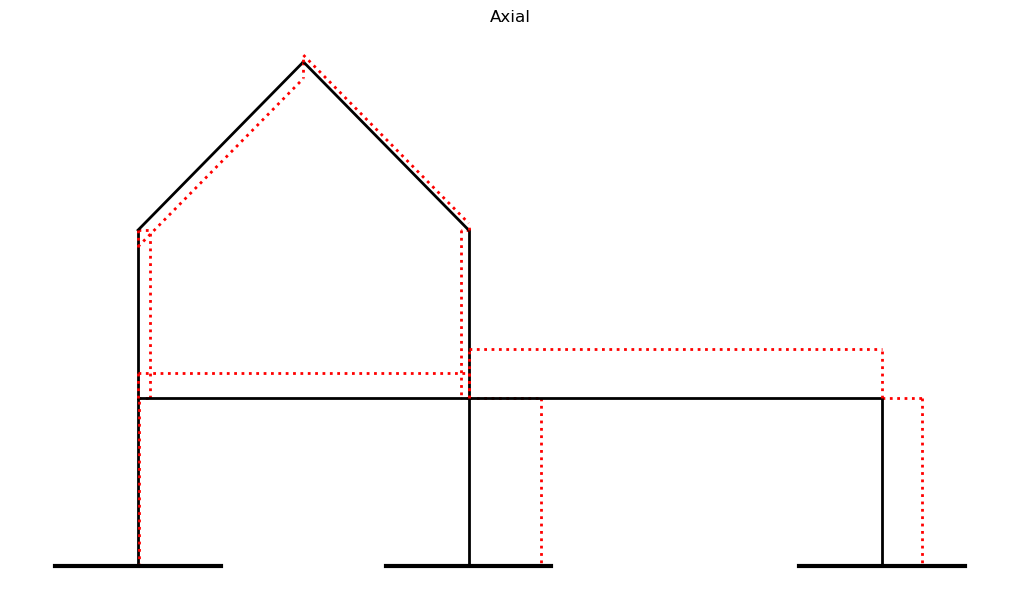

In [91]:
#Grafica de axial
plt.figure(3)
plt.figure('Portico')
plt.title('Axial')

#Grafica porticos
por = np.array([0.1, -0.1, -0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

for i in range(numelem):
    #Portico normal
    plt.plot([Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1], Coorelem[i, 3]], color='black', linewidth=2, linestyle='-')

    #Axial
    if L[i] == Lv:
        #Lineas grandes
        plt.plot([Coorelem[i, 0] - axial[i, 0] * por[i], Coorelem[i, 2] + axial[i, 1] * por[i]], [Coorelem[i, 1], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
        #Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0] - axial[i, 0] * por[i]], [Coorelem[i, 1], Coorelem[i, 1]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2] + axial[i, 1] * por[i]], [Coorelem[i, 3], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
    else:
        plt.plot([Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1] + axial[i, 0] * por[i], Coorelem[i, 3] - axial[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')
        #Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0]], [Coorelem[i, 1], Coorelem[i, 1] + axial[i, 0] * por[i]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2]], [Coorelem[i, 3], Coorelem[i, 3] - axial[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')

# Graficar apoyos
for i in range(3):
    plt.plot([Coorelem[i, 0] - 1, Coorelem[i, 0] + 1], [0, 0], color='black', linewidth=3)

# Configurar la visualización
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()

# Configuración adicional para el gráfico
fig = plt.gcf()
fig.set_visible(True)
fig.set_size_inches(10, 7.5)
plt.gca().set_position([0, 0.25, 1, 0.75])
plt.gca().tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=14)

# Ocultar ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

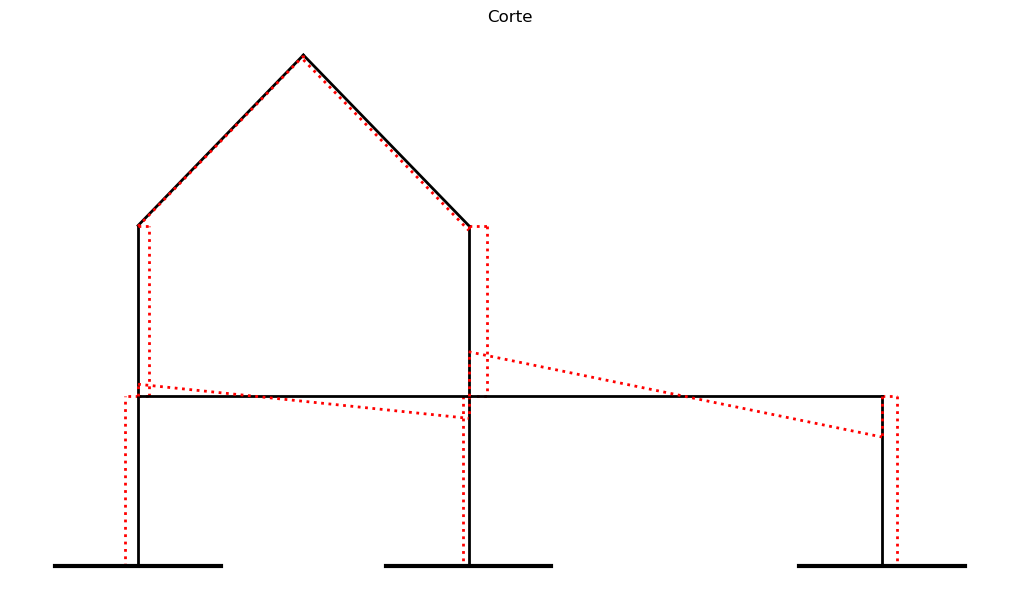

In [92]:
#Grafica de corte
plt.figure(3)
plt.figure('Portico')
plt.title('Corte')

#Grafica porticos
por = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

for i in range (numelem):
    #Portico normal
    plt.plot([Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1], Coorelem[i, 3]], color='black', linewidth=2, linestyle='-')

     # Corte
    if L[i] == Lv:
        # Lineas grandes
        plt.plot([Coorelem[i, 0] + corte[i, 0] * por[i], Coorelem[i, 2] - corte[i, 1] * por[i]], [Coorelem[i, 1], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
        # Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0] + corte[i, 0] * por[i]], [Coorelem[i, 1], Coorelem[i, 1]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2] - corte[i, 1] * por[i]], [Coorelem[i, 3], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
    else:
        # Lineas grandes
        plt.plot([Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1] + corte[i, 0] * por[i], Coorelem[i, 3] - corte[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')
        # Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0]], [Coorelem[i, 1], Coorelem[i, 1] + corte[i, 0] * por[i]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2]], [Coorelem[i, 3], Coorelem[i, 3] - corte[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')

# Graficar apoyos
for i in range(3):
    plt.plot([Coorelem[i, 0] - 1, Coorelem[i, 0] + 1], [0, 0], color='black', linewidth=3)

# Configuración de la visualización
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()

# Configuración adicional para el gráfico
fig = plt.gcf()
fig.set_visible(True)
fig.set_size_inches(10, 7.5)
plt.gca().set_position([0, 0.25, 1, 0.75])
plt.gca().tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=14)

# Ocultar ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

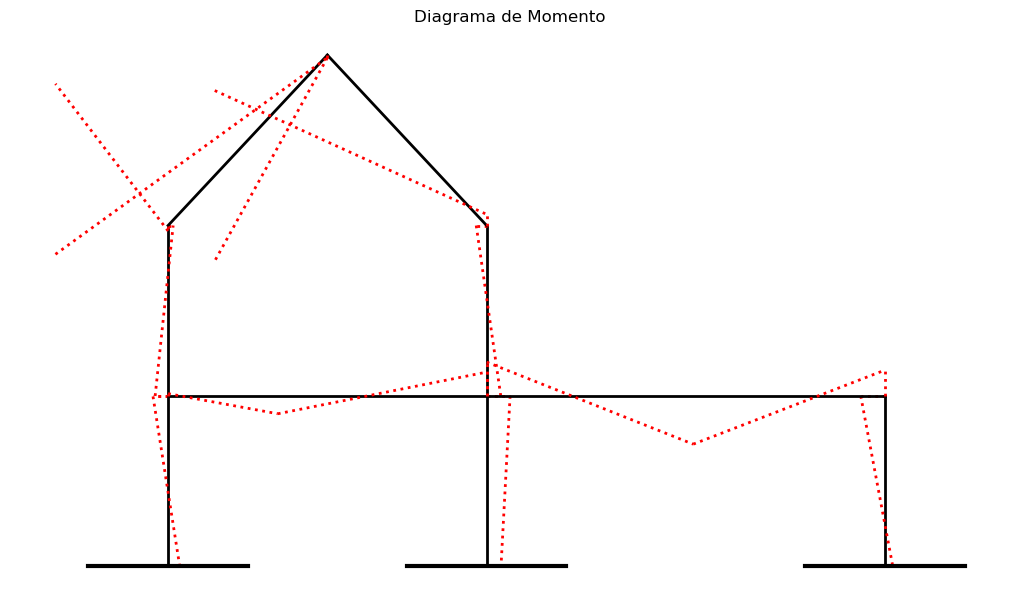

In [96]:
#Grafica de momentos
plt.figure(3)
plt.figure('Portico')
plt.title('Diagrama de Momento')

por = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Graficar porticos y momentos
for i in range(numelem):
    # Portico normal
    plt.plot([Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1], Coorelem[i, 3]], color='black', linewidth=2, linestyle='-')

    # Momento
    if L[i] == Lv:
        # Lineas grandes para columnas
        plt.plot([Coorelem[i, 0] - momento[i, 0] * por[i], Coorelem[i, 2] + momento[i, 1] * por[i]], [Coorelem[i, 1], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
        # Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0] - momento[i, 0] * por[i]], [Coorelem[i, 1], Coorelem[i, 1]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2] + momento[i, 1] * por[i]], [Coorelem[i, 3], Coorelem[i, 3]], color='red', linewidth=2, linestyle=':')
    else:
        # Lineas grandes para las vigas
        plt.plot([Coorelem[i, 0], dismmax[i]+Coorelem[i, 0]], [Coorelem[i, 1] + momento[i, 0] * por[i], Coorelem[i, 3] + momento[i, 0]*por[i] - mmax[i]*(0.25 + por[i])], color='red', linewidth=2, linestyle=':')
        plt.plot([dismmax[i]+Coorelem[i, 0], Coorelem[i, 2]], [Coorelem[i, 1] + momento[i, 0] * por[i] - mmax[i] * (0.25 + por[i]), Coorelem[i, 3] - momento[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')
        # Lineas que unen los diagramas con la armadura
        plt.plot([Coorelem[i, 0], Coorelem[i, 0]], [Coorelem[i, 1], Coorelem[i, 1] + momento[i, 0] * por[i]], color='red', linewidth=2, linestyle=':')
        plt.plot([Coorelem[i, 2], Coorelem[i, 2]], [Coorelem[i, 3], Coorelem[i, 3] - momento[i, 1] * por[i]], color='red', linewidth=2, linestyle=':')

# Graficar apoyos
for i in range(3):
    plt.plot([Coorelem[i, 0] - 1, Coorelem[i, 0] + 1], [0, 0], color='black', linewidth=3)

# Configuración de la visualización
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()

# Configuración adicional para el gráfico
fig = plt.gcf()
fig.set_visible(True)
fig.set_size_inches(10, 7.5)
plt.gca().set_position([0, 0.25, 1, 0.75])
plt.gca().tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=14)

# Ocultar ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()